In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import plot_info # Does this set the plot style ? Yes it does

claims_df = pd.read_csv('preprocessed_data/claims_db_truncated_for_llm.csv')
major_claims_df = claims_df[claims_df['assertion_type'] == 'major_claim']
assessment_columns = ['Unchallenged', 'Verified', 'Partially Verified', 'Mixed', 'Challenged']

aut_pos = "FH"

author_positions = {
    "LH": 
        {
        "fn": 'preprocessed_data/LH_inner.csv',
        "all_binary_variables": {
            "Historical lab": {
                "labels": ['Non-traditional\nLaboratories', 'Traditional-Historical\nLaboratories'],
                "title": "Assessment of Scientific Claims by Laboratory Tradition",
                "fig_name_prefix" : "fig5B_"
                },
            "Continuity": {
                "labels": ['No-continuity \n in the field', 'Continuity \n in the field'],
                "title": "Assessment of Scientific Claims by Continuity",
                "fig_name_prefix" : "fig5B_"
                },
            "Sex": {
                "labels": ["Female", "Male"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by Sex",
                "fig_name_prefix" : "fig5B_",

            }
            }},
    "FH": 
        {
        "fn": 'preprocessed_data/FH_inner.csv',
        "all_binary_variables": {
            "PhD Post-doc": {
                "labels": ['PhD', 'Post-doc'],
                "title": "Assessment of Scientific Claims by Career Stage",
                "fig_name_prefix" : "fig4B_"
                },
            "Sex": {
                "labels": ["Female", "Male"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by Sex",
                "fig_name_prefix" : "fig4B_"
            },
            "MD": {
                "labels": ["Not-MD", "MD"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by MD Degree",
                "fig_name_prefix" : "fig4B_"
            },
            "Become a Pi": {
                "labels": ["Not-Pi", "Pi"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by Becoming a Principal Investigator",
                "fig_name_prefix" : "fig4B_"
            }}},
        }





aut_pos_data  = author_positions[aut_pos]
df = pd.read_csv(aut_pos_data['fn'])
df = df.sort_values(by="Challenged_prop", ascending=False).reset_index(drop=True)

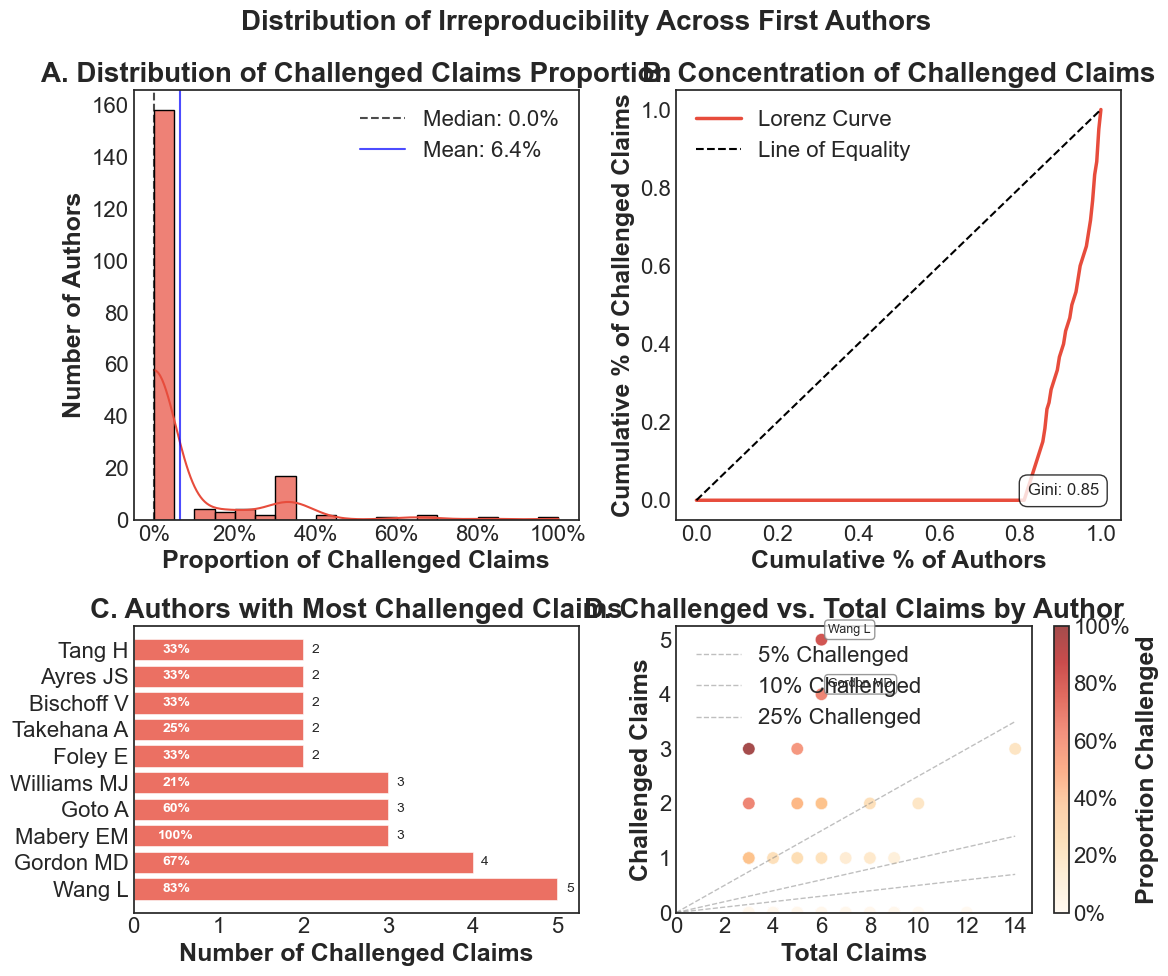

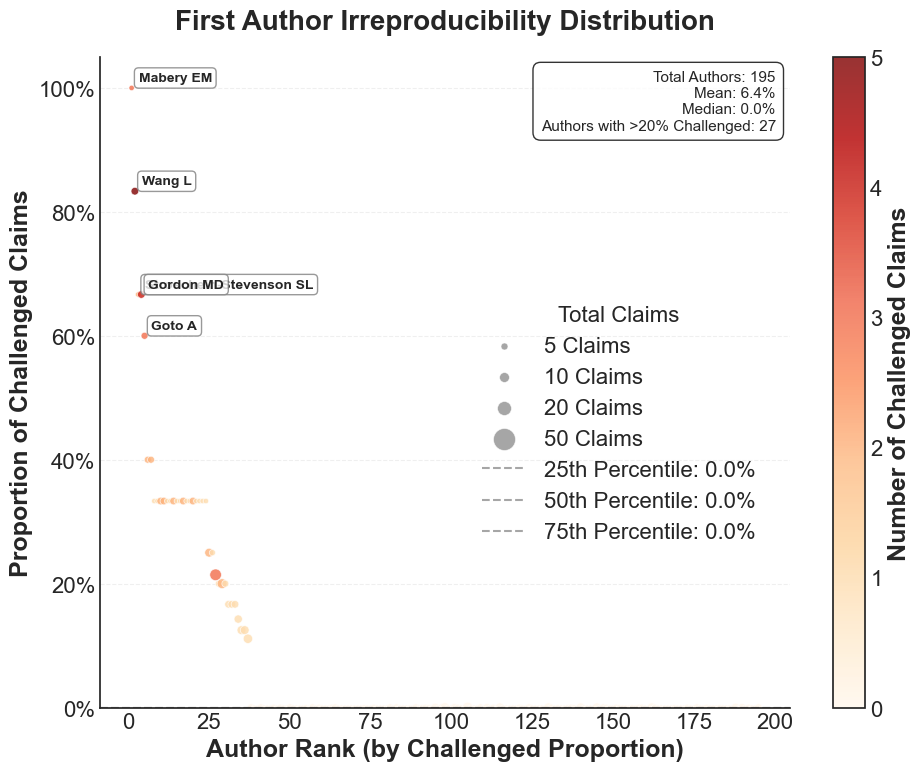

In [11]:
if aut_pos == "FH":
    fig, axes = plot_info.plot_author_irreproducibility_distribution(
        df=df,
        min_claims=3,
        title="Distribution of Irreproducibility Across First Authors"
    )
    plt.savefig('figures/fig4A-V1.png', dpi=300, bbox_inches='tight')
    fig, ax = plot_info.plot_author_irreproducibility_focused(
        df=df,
        min_claims=3,
        title="First Author Irreproducibility Distribution"
    )
    plt.savefig('figures/fig4A-V2.png', dpi=300, bbox_inches='tight')

In [7]:
if aut_pos == "LH":
    plt.scatter(df["Challenged_prop"], df["Major claims"], s=df["Unchallenged_prop"]*100, c=df["Historical lab"]+10*4, cmap='viridis', alpha=0.5)

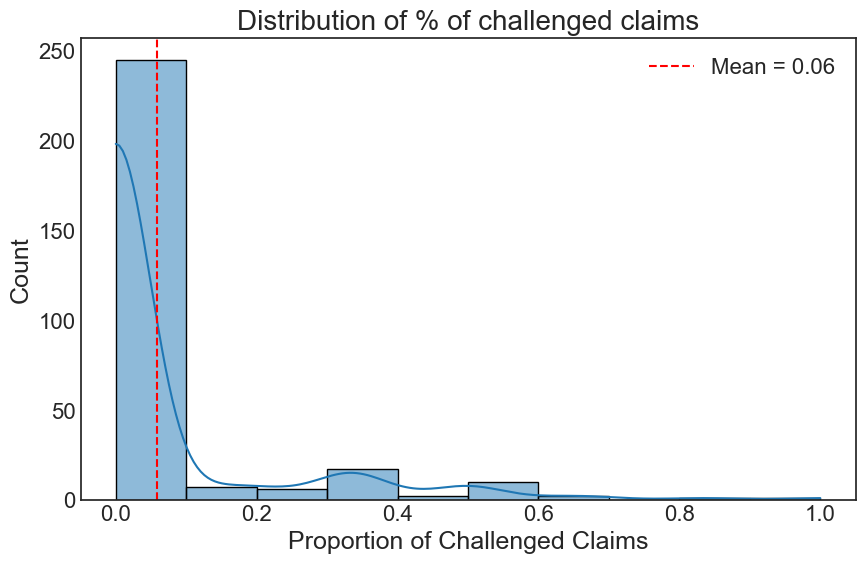

Descriptive Statistics:


,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Unchallenged_prop,Verified_prop,Partially Verified_prop,Mixed_prop,Challenged_prop,Challenged_prop,Articles,Major claims
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,0.824742,2.085911,0.257732,0.041237,0.237113,0.255200,0.605018,0.072174,0.009011,0.058597,0.058597,1.371134,3.446735
std,1.129635,1.708853,0.530680,0.245688,0.650303,0.338997,0.363595,0.162218,0.056905,0.153593,0.153593,0.704462,1.963393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
max,7.000000,11.000000,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,5.000000,14.000000


In [17]:
# Let's examine the distribution of this score
plt.figure(figsize=(10, 6))
sns.histplot(df['Challenged_prop'], kde=True)
plt.title('Distribution of % of challenged claims')
plt.xlabel('Proportion of Challenged Claims')
plt.axvline(df['Challenged_prop'].mean(), color='red', linestyle='--', 
            label=f'Mean = {df["Challenged_prop"].mean():.2f}')
plt.legend()
plt.show()

# Basic descriptive statistics
descriptive_stats = df[assessment_columns + [col + '_prop' for col in assessment_columns] + 
                     ['Challenged_prop', 'Articles', 'Major claims']].describe()
print("Descriptive Statistics:")
descriptive_stats


Summary of PhD Post-doc:
              Major claims  Articles  Verified_prop  Challenged_prop  \
PhD Post-doc                                                           
??                      19         9       0.578947         0.105263   
Master                  18         6       0.444444         0.166667   
PI                      42        18       0.500000         0.119048   
PhD                    558       223       0.598566         0.064516   
Pi                       5         2       0.400000         0.200000   
Post-doc               319       125       0.639498         0.068966   
Senior Staff            20         7       0.550000         0.000000   
Tech                    12         5       0.833333         0.000000   
academic                 3         1       1.000000         0.000000   

              Unchallenged_prop  
PhD Post-doc                     
??                     0.263158  
Master                 0.222222  
PI                     0.285714  
PhD         

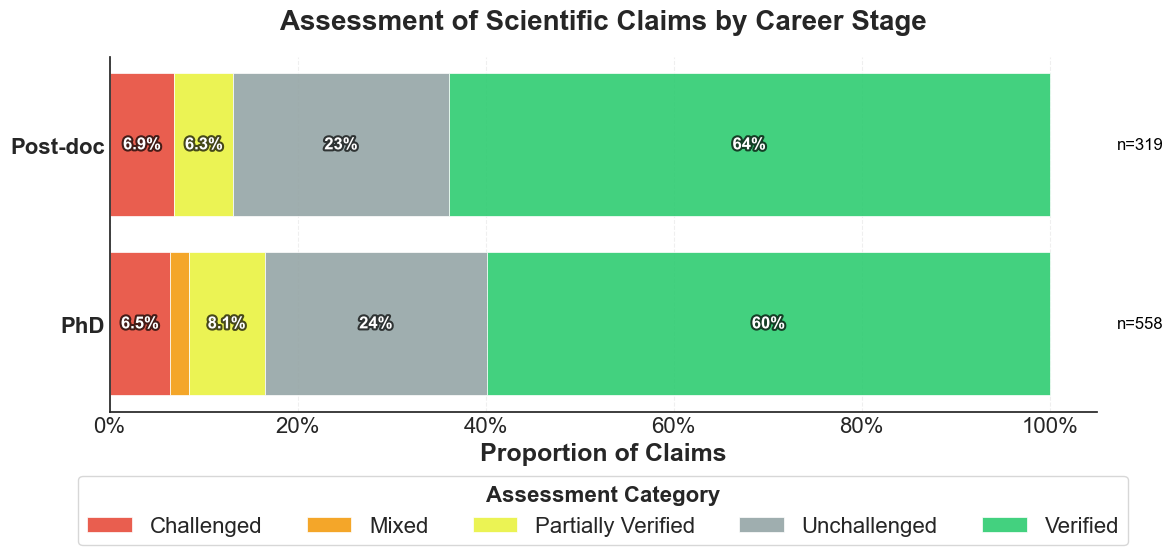

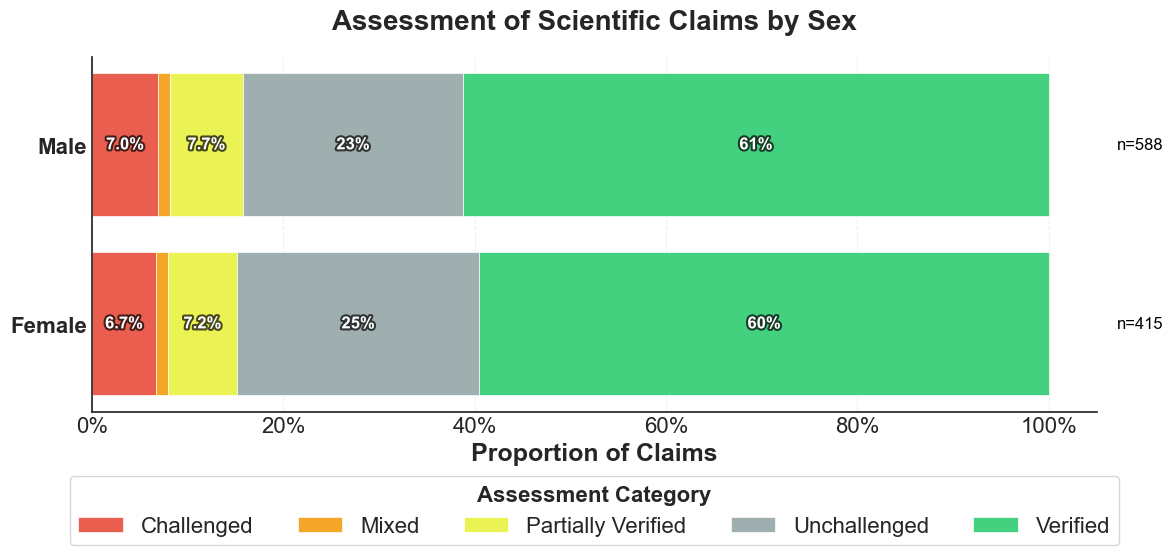

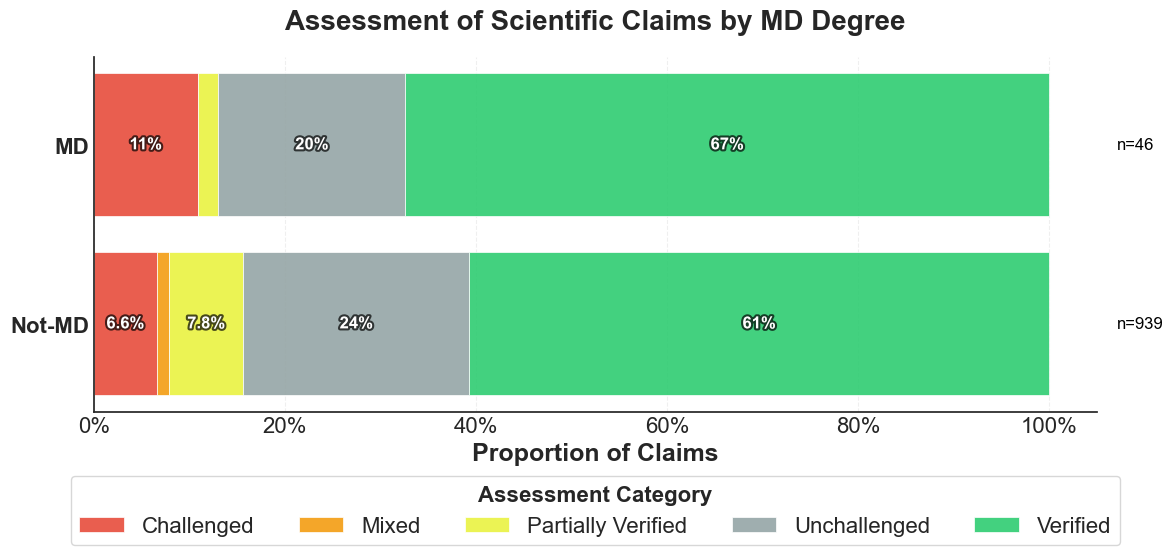

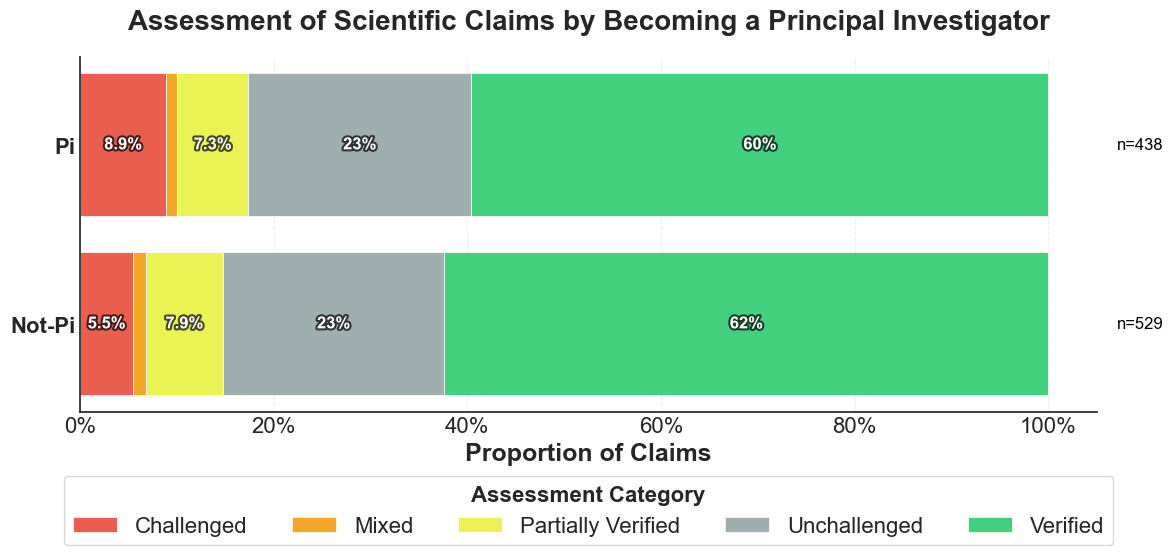

In [19]:
to_plot = df.copy()
to_plot
all_binary_variables = aut_pos_data["all_binary_variables"]
for variable in all_binary_variables.keys():
    # Group by historical lab status
    var_grouped = df.groupby(variable).agg({
        **{col: 'sum' for col in assessment_columns},
        'Major claims': 'sum',
        'Articles': 'sum',
    })

    # Calculate proportions
    for col in assessment_columns:
        var_grouped[f'{col}_prop'] = var_grouped[col] / var_grouped['Major claims']

    print(f"Summary of {variable}:")
    print(var_grouped[['Major claims', 'Articles', 
                        'Verified_prop', 'Challenged_prop', 'Unchallenged_prop']])
    print(var_grouped.index)
    if variable == "PhD Post-doc":
        var_grouped = var_grouped.loc[["PhD", "Post-doc"]]
    
    
    fig, ax = plot_info.create_horizontal_bar_chart(var_grouped, show_p_value=False, labels=all_binary_variables[variable]["labels"], title=all_binary_variables[variable]["title"])
    plt.savefig(f"figures/{all_binary_variables[variable]['fig_name_prefix']}binary_{variable}.png", dpi=300, bbox_inches='tight')


In [20]:
to_plot["Articles"].value_counts()

Articles
1    213
2     55
3     17
4      5
5      1
Name: count, dtype: int64

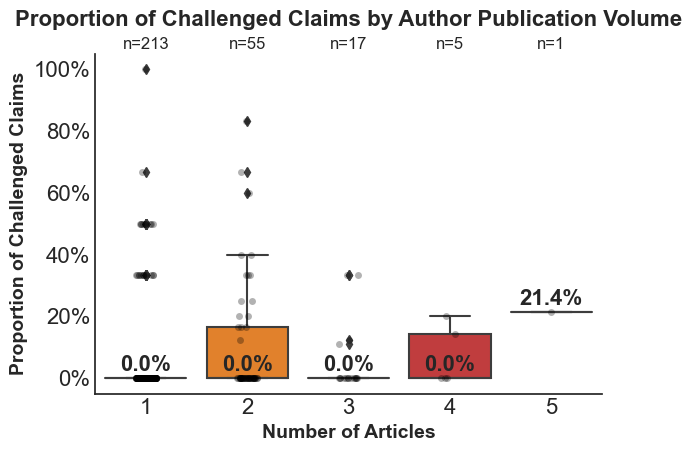

In [23]:

# Create article count bins
article_bins = [.5, 1.5, 2.5, 3.5, 4.5,  float('inf')]
bin_labels =     ['1', '2', '3', '4', '5']
to_plot['Article_bin'] = pd.cut(to_plot['Articles'], bins=article_bins, labels=bin_labels)

# Create the boxplot
ax = sns.boxplot(x='Article_bin', y='Challenged_prop', data=to_plot)

# Add individual data points
sns.stripplot(x='Article_bin', y='Challenged_prop', data=to_plot, 
              color='black', alpha=0.3, jitter=True)

# Add count annotations below each category
for i, cat in enumerate(bin_labels):
    count = len(to_plot[to_plot['Article_bin'] == cat])
    ax.text(i, 1.05, f"n={count}", ha='center', va='top', fontsize=12,
            transform=ax.get_xaxis_transform())

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(plot_info.PercentFormatter(1.0))

# Add labels and title
plt.xlabel('Number of Articles', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Challenged Claims', fontsize=14, fontweight='bold')
plt.title('Proportion of Challenged Claims by Author Publication Volume', 
          fontsize=16, fontweight='bold', pad=20)

# Add median values on top of each box
medians = to_plot.groupby('Article_bin')['Challenged_prop'].median()
for i, m in enumerate(medians):
    ax.text(i, m + 0.01, f"{m:.1%}", ha='center', va='bottom', fontweight='bold')

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.savefig('figures/fig4B-nb_article.png', dpi=300, bbox_inches='tight')

In [20]:
to_plot.columns

Index(['Name', 'F and L', 'Sex', 'Articles', 'Major claims', 'Unchallenged',
       'Verified', 'Partially Verified', 'Mixed', 'Challenged', 'Start lab',
       'Finish', 'Authorship', 'first_author_key', 'first author',
       'PhD Post-doc', 'Become a Pi', 'current job', 'MD', 'Affiliation',
       'Country', 'Ivy league', 'last_author_key', 'article_id',
       'Unchallenged_prop', 'Verified_prop', 'Partially Verified_prop',
       'Mixed_prop', 'Challenged_prop', 'reproducibility_score'],
      dtype='object')

### Continuous Variables

/Users/chadi/Research/drosophila-reproducibility/plot_info.py:1357: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


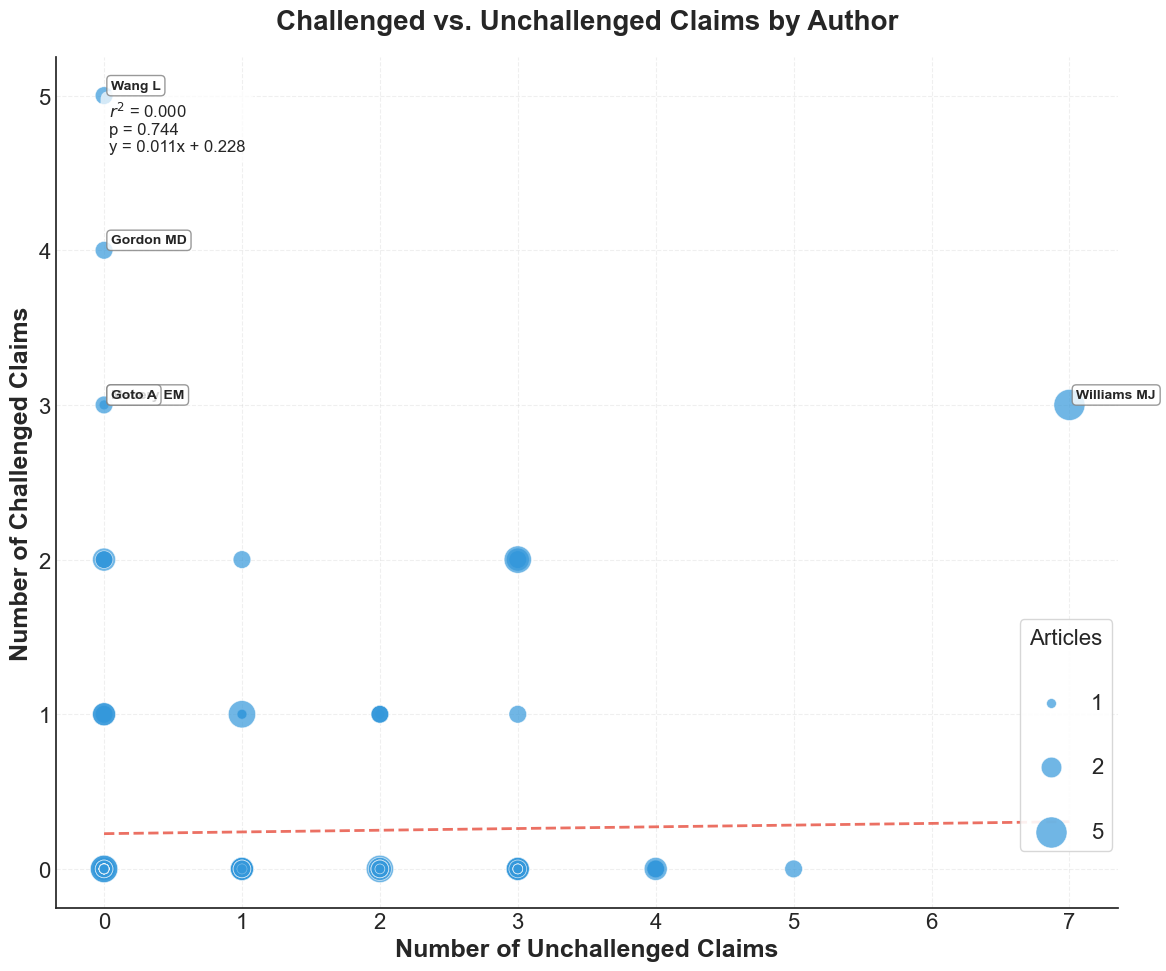

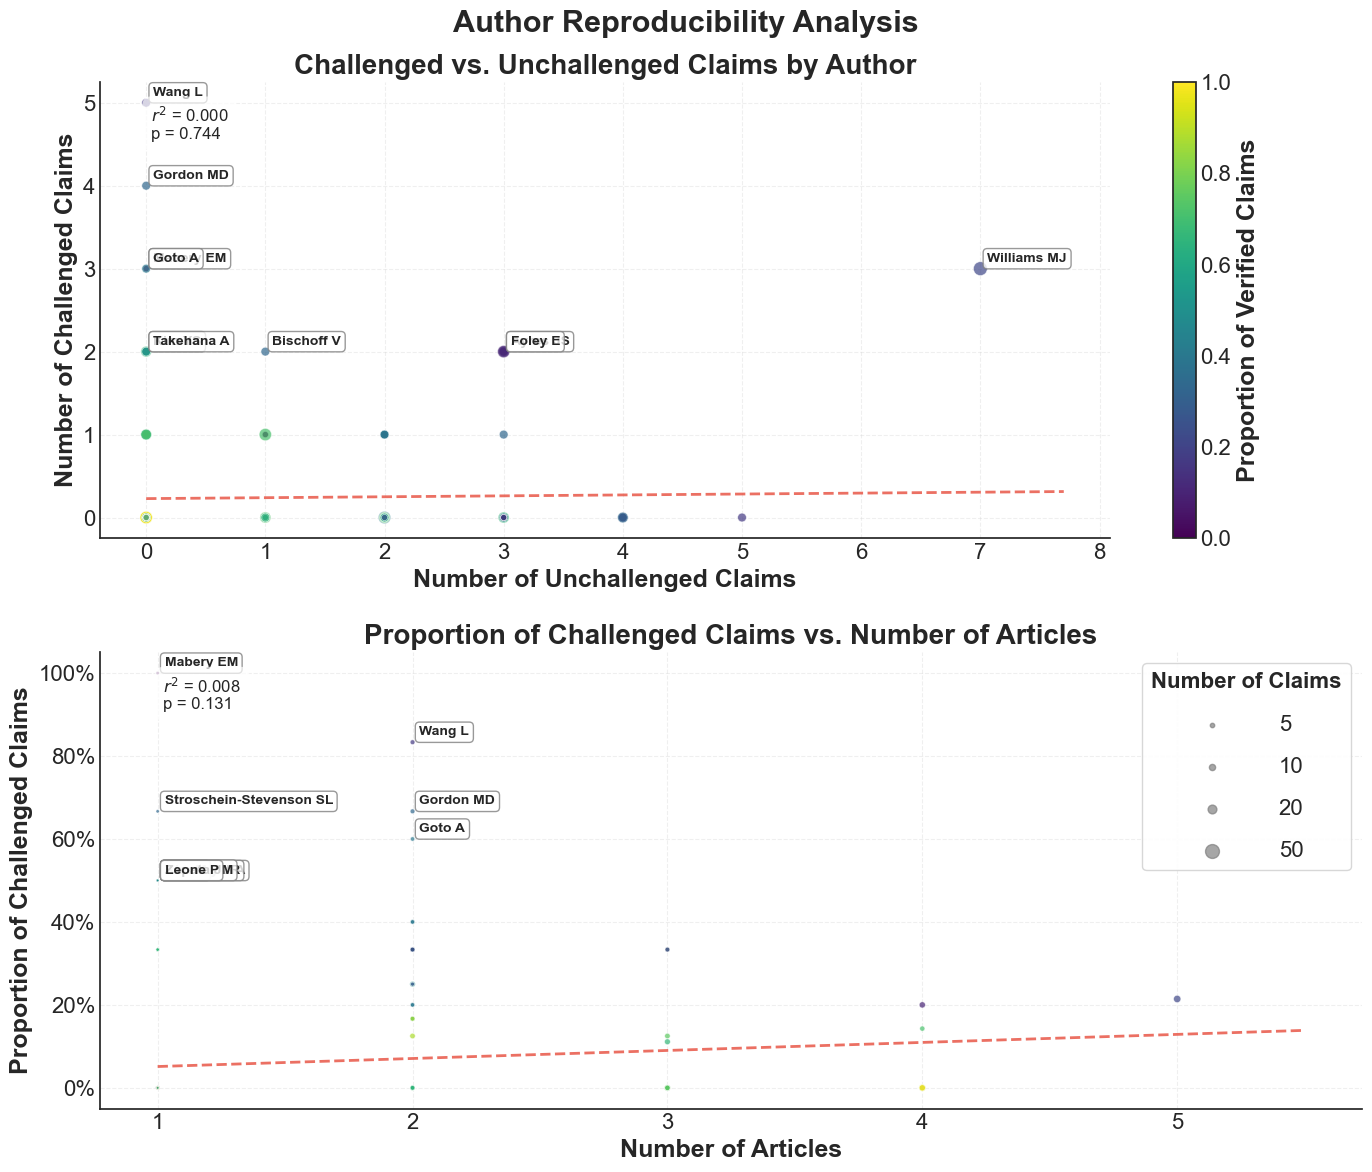

In [10]:

# Example usage for general scatter plot:
fig, ax = plot_info.create_publication_scatter(
    to_plot,
    x_var='Unchallenged', 
    y_var='Challenged',
    size_var='Articles', 
    title='Challenged vs. Unchallenged Claims by Author',
    x_label='Number of Unchallenged Claims',
    y_label='Number of Challenged Claims',
    annotate_top_n=5
)
plt.savefig(f'{aut_pos}_author_publication.png', dpi=300, bbox_inches='tight')
# Example usage for specialized author reproducibility plot:
fig = plot_info.create_author_reproducibility_scatter(
    to_plot, 
    min_articles=1, 
    min_claims=1,
    annotate_top_n=10
)

# Save examples:
plt.savefig(f'{aut_pos}_author_reproducibility.png', dpi=300, bbox_inches='tight')
#plt.savefig('author_reproducibility.pdf', bbox_inches='tight')

### Countries

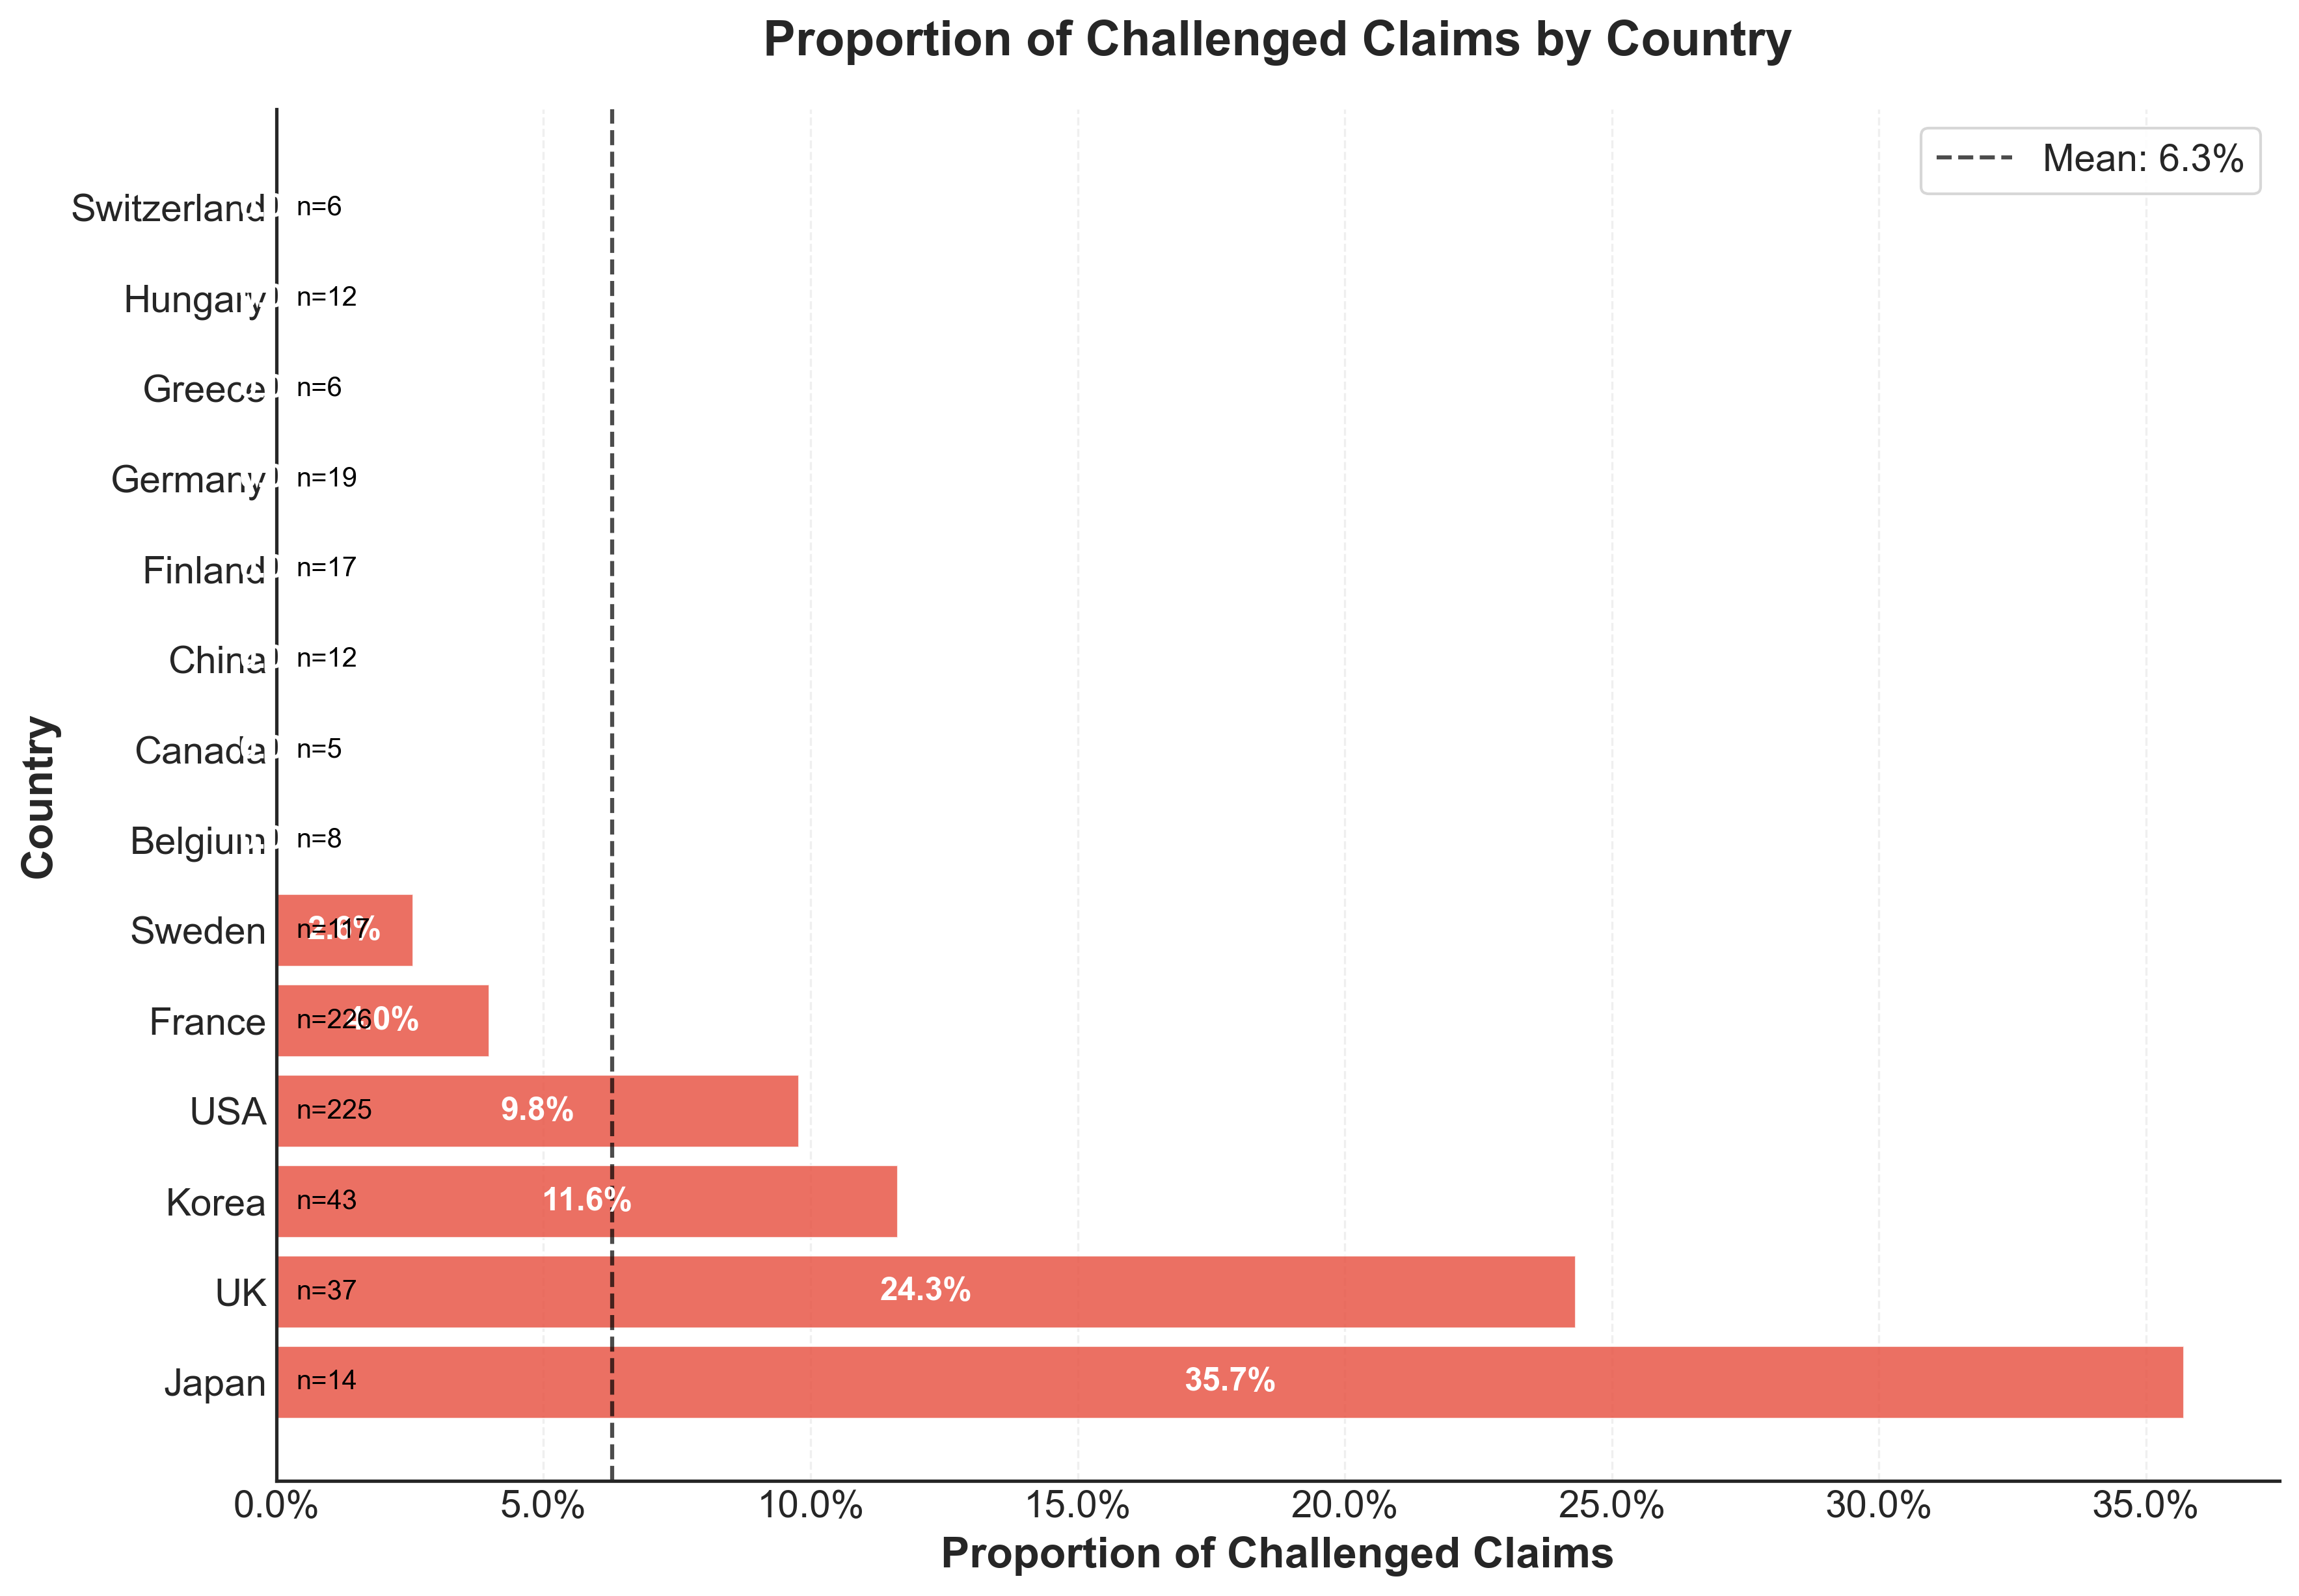

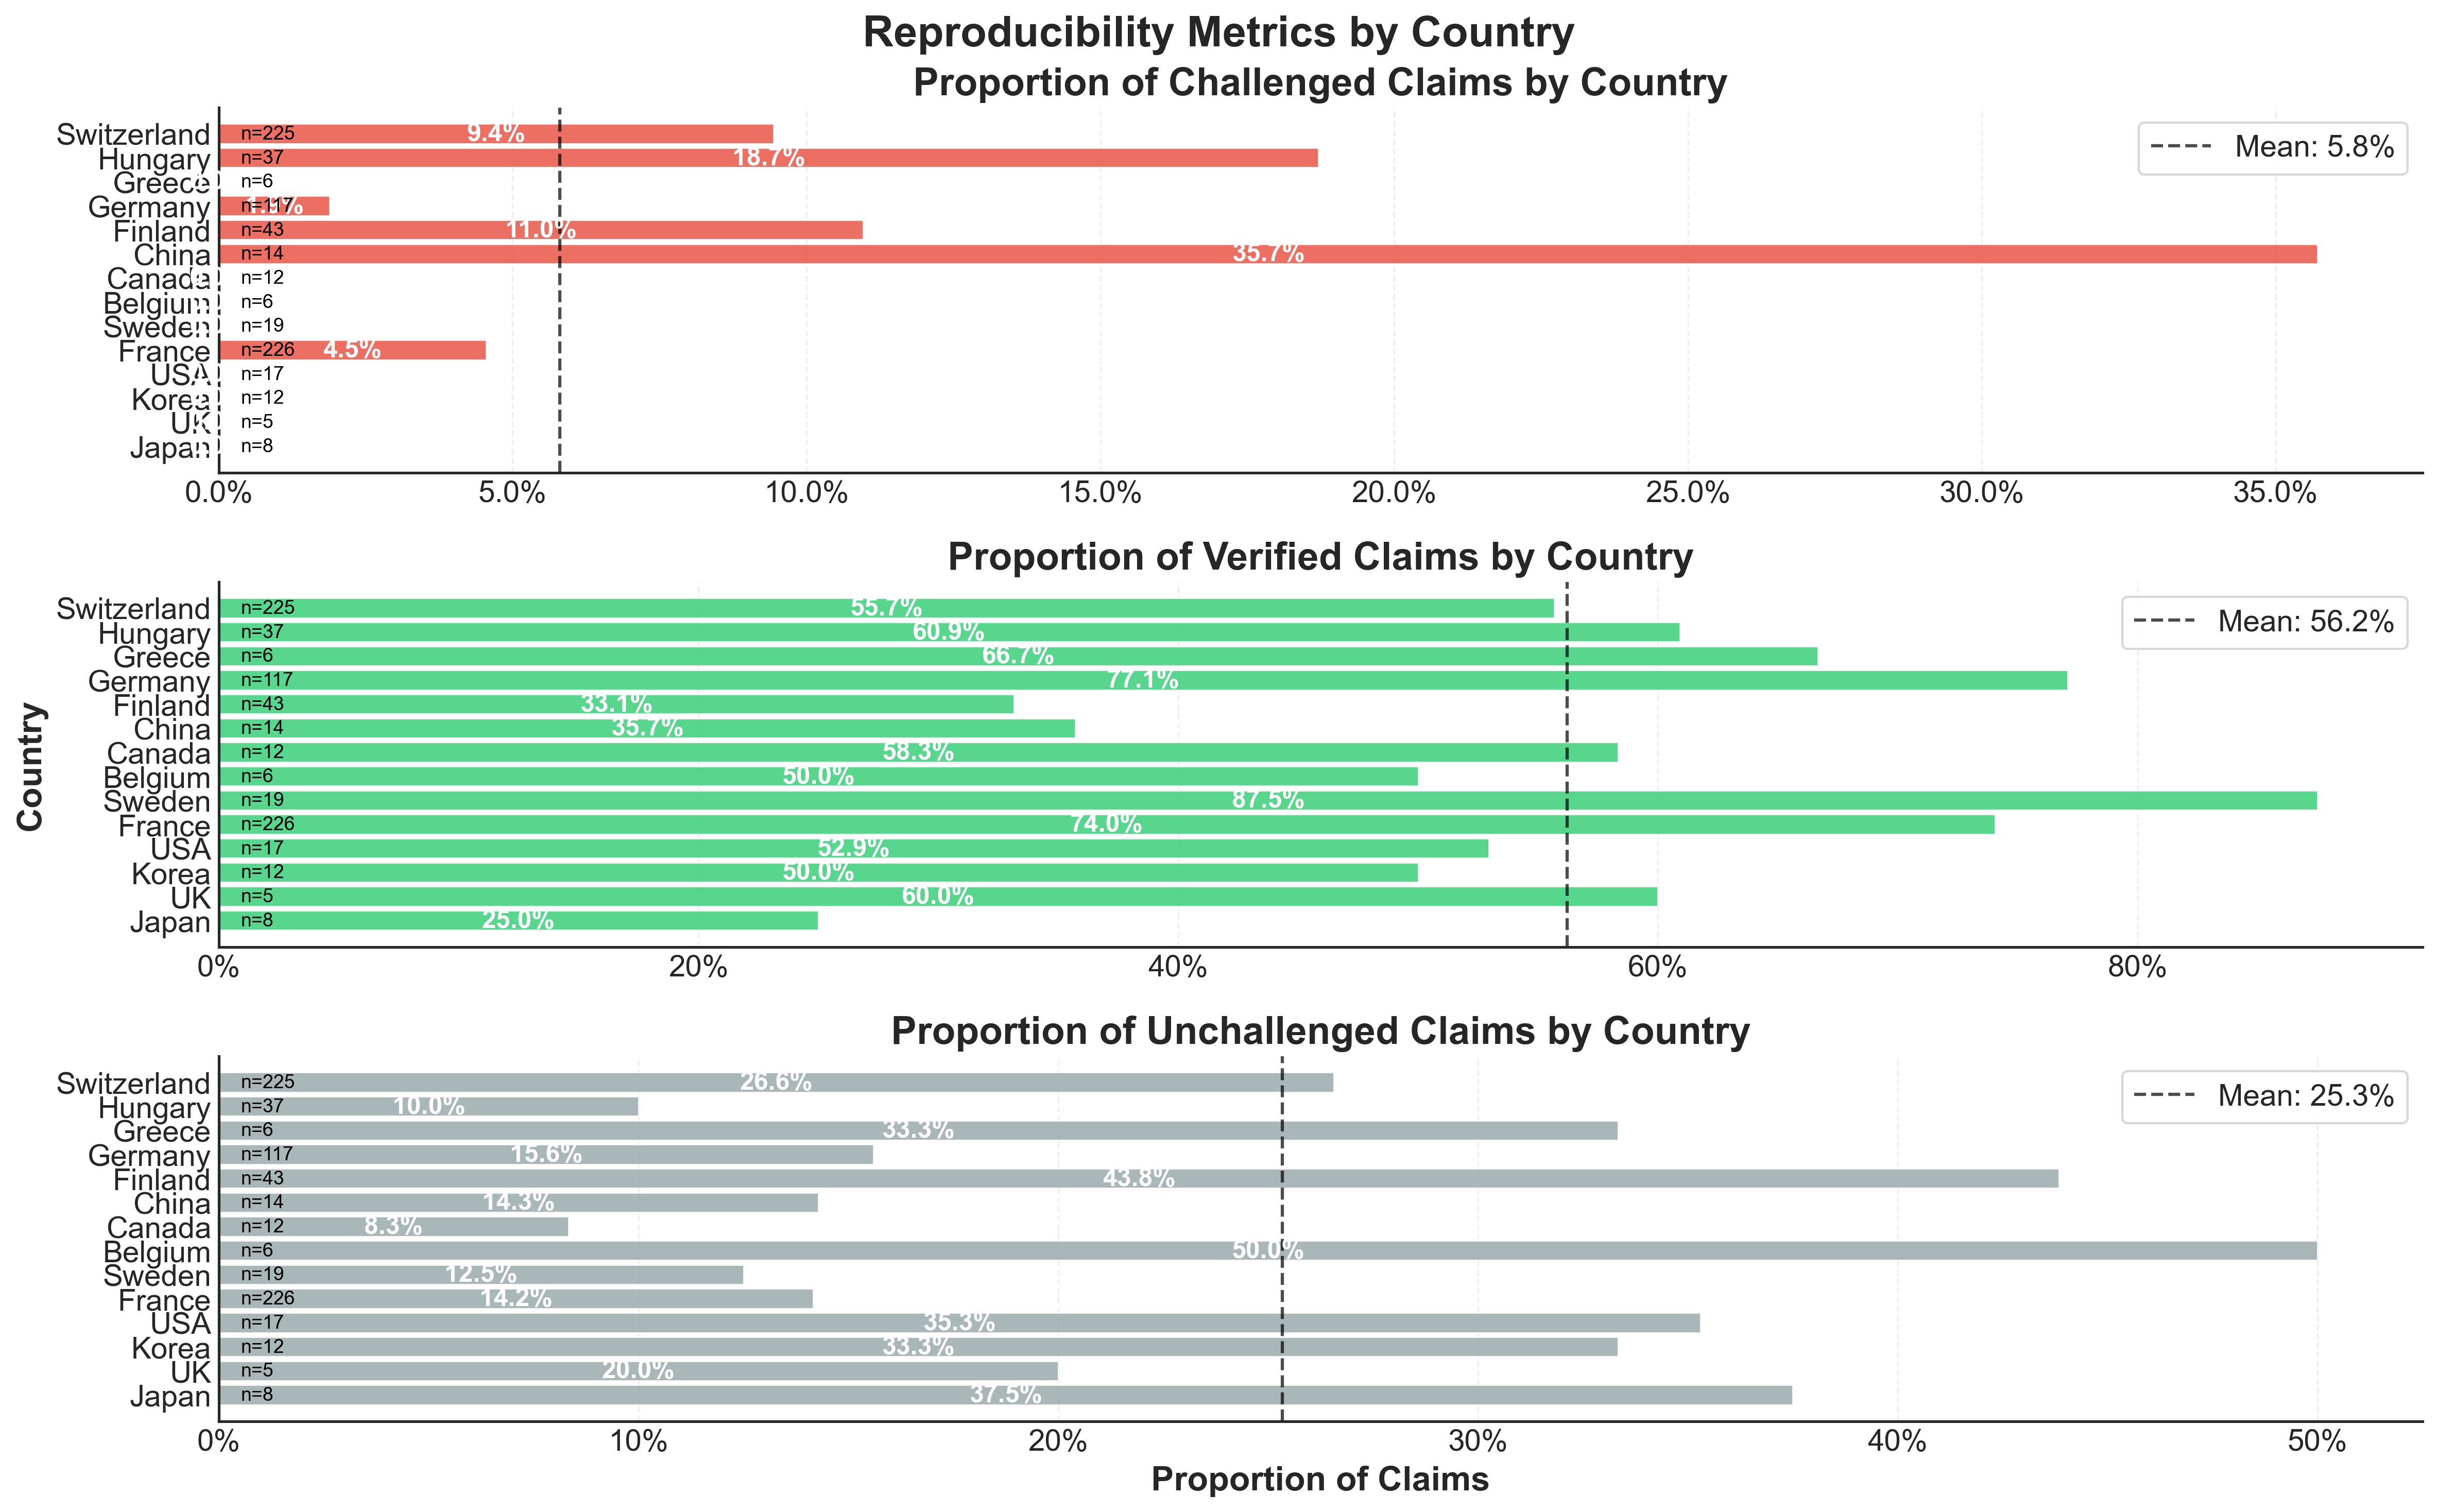

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib as mpl

# Set style parameters
plt.style.use('seaborn-v0_8-white')
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# Set figure DPI for publication quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# Custom colors for categories
ASSESSMENT_COLORS = {
    'Challenged': '#e74c3c',       # Red
    'Mixed': '#f39c12',            # Orange
    'Unchallenged': '#95a5a6',     # Gray
    'Partially Verified': '#f1c40f', # Yellow
    'Verified': '#2ecc71'          # Green
}

def create_simple_horizontal_country_chart(
    df,
    country_col='Country',
    var_to_plot='Challenged_prop',
    min_claims=5,
    sort_by_value=True,
    title=None,
    x_label=None,
    annotate_counts=True,
    fig_size=(12, 8)
):
    """
    Create a simple horizontal bar chart showing a variable by country.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe with country-level data
    country_col : str, default='Country'
        Column name for country
    var_to_plot : str, default='Challenged_prop'
        Column to plot (e.g., 'Challenged_prop', 'Verified_prop')
    min_claims : int, default=5
        Minimum number of claims for a country to be included
    sort_by_value : bool, default=True
        If True, sort countries by the value being plotted
    title : str, optional
        Plot title
    x_label : str, optional
        X-axis label
    annotate_counts : bool, default=True
        Whether to add count annotations to bars
    fig_size : tuple, default=(12, 8)
        Figure size
        
    Returns:
    --------
    fig, ax : matplotlib Figure and Axes objects
    """
    # Filter data
    filtered_df = df[df['Major claims'] >= min_claims].copy()
    
    # Determine if it's a percentage variable
    is_percent = '_prop' in var_to_plot
    
    # Aggregate data by country
    if is_percent:
        # For proportion variables, we need to calculate weighted average
        num_var = var_to_plot.replace('_prop', '')
        claims_by_country = filtered_df.groupby(country_col)['Major claims'].sum()
        counts_by_country = filtered_df.groupby(country_col)[num_var].sum()
        
        country_data = pd.DataFrame({
            'Major claims': claims_by_country,
            var_to_plot: counts_by_country / claims_by_country
        }).reset_index()
    else:
        # For count variables, we can just sum
        country_data = filtered_df.groupby(country_col).agg({
            var_to_plot: 'sum',
            'Major claims': 'sum'
        }).reset_index()
    
    # Sort data if requested
    if sort_by_value:
        country_data = country_data.sort_values(by=var_to_plot, ascending=False)
    else:
        country_data = country_data.sort_values(by=country_col)
    
    # Adjust figure height based on number of countries
    country_count = len(country_data)
    if country_count < 5:
        fig_size = (fig_size[0], max(4, country_count * 0.8))
    elif country_count > 12:
        fig_size = (fig_size[0], min(16, country_count * 0.6))
    
    # Create figure
    fig, ax = plt.subplots(figsize=fig_size)
    
    # Get color based on variable
    if 'Challenged' in var_to_plot:
        color = ASSESSMENT_COLORS['Challenged']
    elif 'Verified' in var_to_plot:
        color = ASSESSMENT_COLORS['Verified']
    elif 'Unchallenged' in var_to_plot:
        color = ASSESSMENT_COLORS['Unchallenged']
    elif 'Mixed' in var_to_plot:
        color = ASSESSMENT_COLORS['Mixed']
    elif 'Partially Verified' in var_to_plot:
        color = ASSESSMENT_COLORS['Partially Verified']
    else:
        color = '#3498db'  # Default blue
    
    # Plot horizontal bars
    bars = ax.barh(
        country_data[country_col],
        country_data[var_to_plot],
        color=color,
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )
    
    # Add value labels to bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        
        # Format label based on whether it's a percentage
        if is_percent:
            label = f"{width:.1%}"
        else:
            label = f"{width:.0f}"
        
        ax.text(
            width/2,
            bar.get_y() + bar.get_height()/2,
            label,
            ha='center', va='center',
            color='white', fontweight='bold', fontsize=12
        )
    
    # Add count annotations if requested
    if annotate_counts:
        for i, (_, row) in enumerate(country_data.iterrows()):
            ax.text(
                0.01,
                i,
                f"n={int(row['Major claims'])}",
                va='center', ha='left',
                fontsize=10, color='black',
                transform=ax.get_yaxis_transform()
            )
    
    # Format x-axis as percentage if appropriate
    if is_percent:
        ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    
    # Add global mean line
    mean_val = country_data[var_to_plot].mean()
    if is_percent:
        mean_label = f"Mean: {mean_val:.1%}"
    else:
        mean_label = f"Mean: {mean_val:.1f}"
    
    ax.axvline(
        mean_val,
        color='black',
        linestyle='--',
        alpha=0.7,
        linewidth=1.5,
        label=mean_label
    )
    
    # Set labels and title
    if x_label:
        ax.set_xlabel(x_label, fontweight='bold')
    else:
        # Generate a reasonable x-label from the variable name
        if is_percent:
            x_label = f"Proportion of {var_to_plot.replace('_prop', '')} Claims"
        else:
            x_label = f"Number of {var_to_plot} Claims"
        ax.set_xlabel(x_label, fontweight='bold')
    
    ax.set_ylabel('Country', fontweight='bold')
    
    if title:
        ax.set_title(title, fontweight='bold', pad=20)
    else:
        if is_percent:
            title = f"Proportion of {var_to_plot.replace('_prop', '')} Claims by Country"
        else:
            title = f"{var_to_plot} Claims by Country"
        ax.set_title(title, fontweight='bold', pad=20)
    
    # Customize grid
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add legend
    ax.legend(loc='best', frameon=True, framealpha=0.9, edgecolor='lightgray')
    
    # Tight layout
    plt.tight_layout()
    
    return fig, ax

def create_country_comparison(
    df,
    country_col='Country',
    min_claims=5,
    title="Reproducibility Metrics by Country",
    fig_size=(16, 10)
):
    """
    Create a set of simple horizontal bar charts for comparing different reproducibility
    metrics across countries.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe with country-level data
    country_col : str, default='Country'
        Column name for country
    min_claims : int, default=5
        Minimum number of claims for a country to be included
    title : str, optional
        Main title for the figure
    fig_size : tuple, default=(16, 10)
        Figure size
        
    Returns:
    --------
    fig : matplotlib Figure object
    """
    # Filter data
    filtered_df = df[df['Major claims'] >= min_claims].copy()
    
    # Calculate proportions if not already present
    if 'Challenged_prop' not in filtered_df.columns:
        # Group by country to calculate proportions
        country_agg = filtered_df.groupby(country_col).agg({
            'Challenged': 'sum',
            'Verified': 'sum',
            'Unchallenged': 'sum',
            'Major claims': 'sum'
        }).reset_index()
        
        # Calculate proportions
        country_agg['Challenged_prop'] = country_agg['Challenged'] / country_agg['Major claims']
        country_agg['Verified_prop'] = country_agg['Verified'] / country_agg['Major claims']
        country_agg['Unchallenged_prop'] = country_agg['Unchallenged'] / country_agg['Major claims']
    else:
        # Already have proportions
        country_agg = filtered_df.groupby(country_col).agg({
            'Challenged_prop': 'mean',
            'Verified_prop': 'mean',
            'Unchallenged_prop': 'mean',
            'Major claims': 'sum'
        }).reset_index()
    
    # Sort countries by challenged proportion
    sorted_countries = country_agg.sort_values('Challenged_prop', ascending=False)[country_col].tolist()
    
    # Create figure with multiple subplots
    fig, axes = plt.subplots(3, 1, figsize=fig_size)
    
    # Plot challenged proportion
    bars1 = axes[0].barh(
        country_agg[country_col],
        country_agg['Challenged_prop'],
        color=ASSESSMENT_COLORS['Challenged'],
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )
    
    # Plot verified proportion
    bars2 = axes[1].barh(
        country_agg[country_col],
        country_agg['Verified_prop'],
        color=ASSESSMENT_COLORS['Verified'],
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )
    
    # Plot unchallenged proportion
    bars3 = axes[2].barh(
        country_agg[country_col],
        country_agg['Unchallenged_prop'],
        color=ASSESSMENT_COLORS['Unchallenged'],
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )
    
    # Add value labels and customize each subplot
    for ax_idx, (bars, metric, title_text) in enumerate(zip(
        [bars1, bars2, bars3],
        ['Challenged_prop', 'Verified_prop', 'Unchallenged_prop'],
        ['Challenged Claims', 'Verified Claims', 'Unchallenged Claims']
    )):
        ax = axes[ax_idx]
        
        # Add bar labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            label = f"{width:.1%}"
            ax.text(
                width/2,
                bar.get_y() + bar.get_height()/2,
                label,
                ha='center', va='center',
                color='white', fontweight='bold', fontsize=12
            )
        
        # Add count annotations
        for i, (_, row) in enumerate(country_agg.iterrows()):
            ax.text(
                0.01,
                i,
                f"n={int(row['Major claims'])}",
                va='center', ha='left',
                fontsize=9, color='black',
                transform=ax.get_yaxis_transform()
            )
        
        # Add mean line
        mean_val = country_agg[metric].mean()
        ax.axvline(
            mean_val,
            color='black',
            linestyle='--',
            alpha=0.7,
            linewidth=1.5,
            label=f"Mean: {mean_val:.1%}"
        )
        
        # Format axis
        ax.xaxis.set_major_formatter(PercentFormatter(1.0))
        ax.set_title(f"Proportion of {title_text} by Country", fontweight='bold')
        
        # Only add x-label to bottom plot
        if ax_idx == 2:
            ax.set_xlabel('Proportion of Claims', fontweight='bold')
        
        # Only add y-label to middle plot
        if ax_idx == 1:
            ax.set_ylabel('Country', fontweight='bold')
        
        # Customize grid and spines
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        ax.set_axisbelow(True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Add legend
        ax.legend(loc='best', frameon=True, framealpha=0.9, edgecolor='lightgray')
    
    # Ensure all plots show the same countries in the same order
    for ax in axes:
        ax.set_yticks(range(len(sorted_countries)))
        ax.set_yticklabels(sorted_countries)
    
    # Add main title
    fig.suptitle(title, fontsize=BIGGER_SIZE+2, fontweight='bold', y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.3)
    
    return fig, axes

# Example usage for simple chart:
fig, ax = create_simple_horizontal_country_chart(
    df=to_plot,
    var_to_plot='Challenged_prop',
    min_claims=5,
    title='Proportion of Challenged Claims by Country',
    x_label='Proportion of Challenged Claims'
)

# Example usage for multi-metric comparison:
fig, axes = create_country_comparison(
    df=to_plot,
    min_claims=5,
    title="Reproducibility Metrics by Country"
)

# plt.savefig('country_comparison.png', dpi=300, bbox_inches='tight')

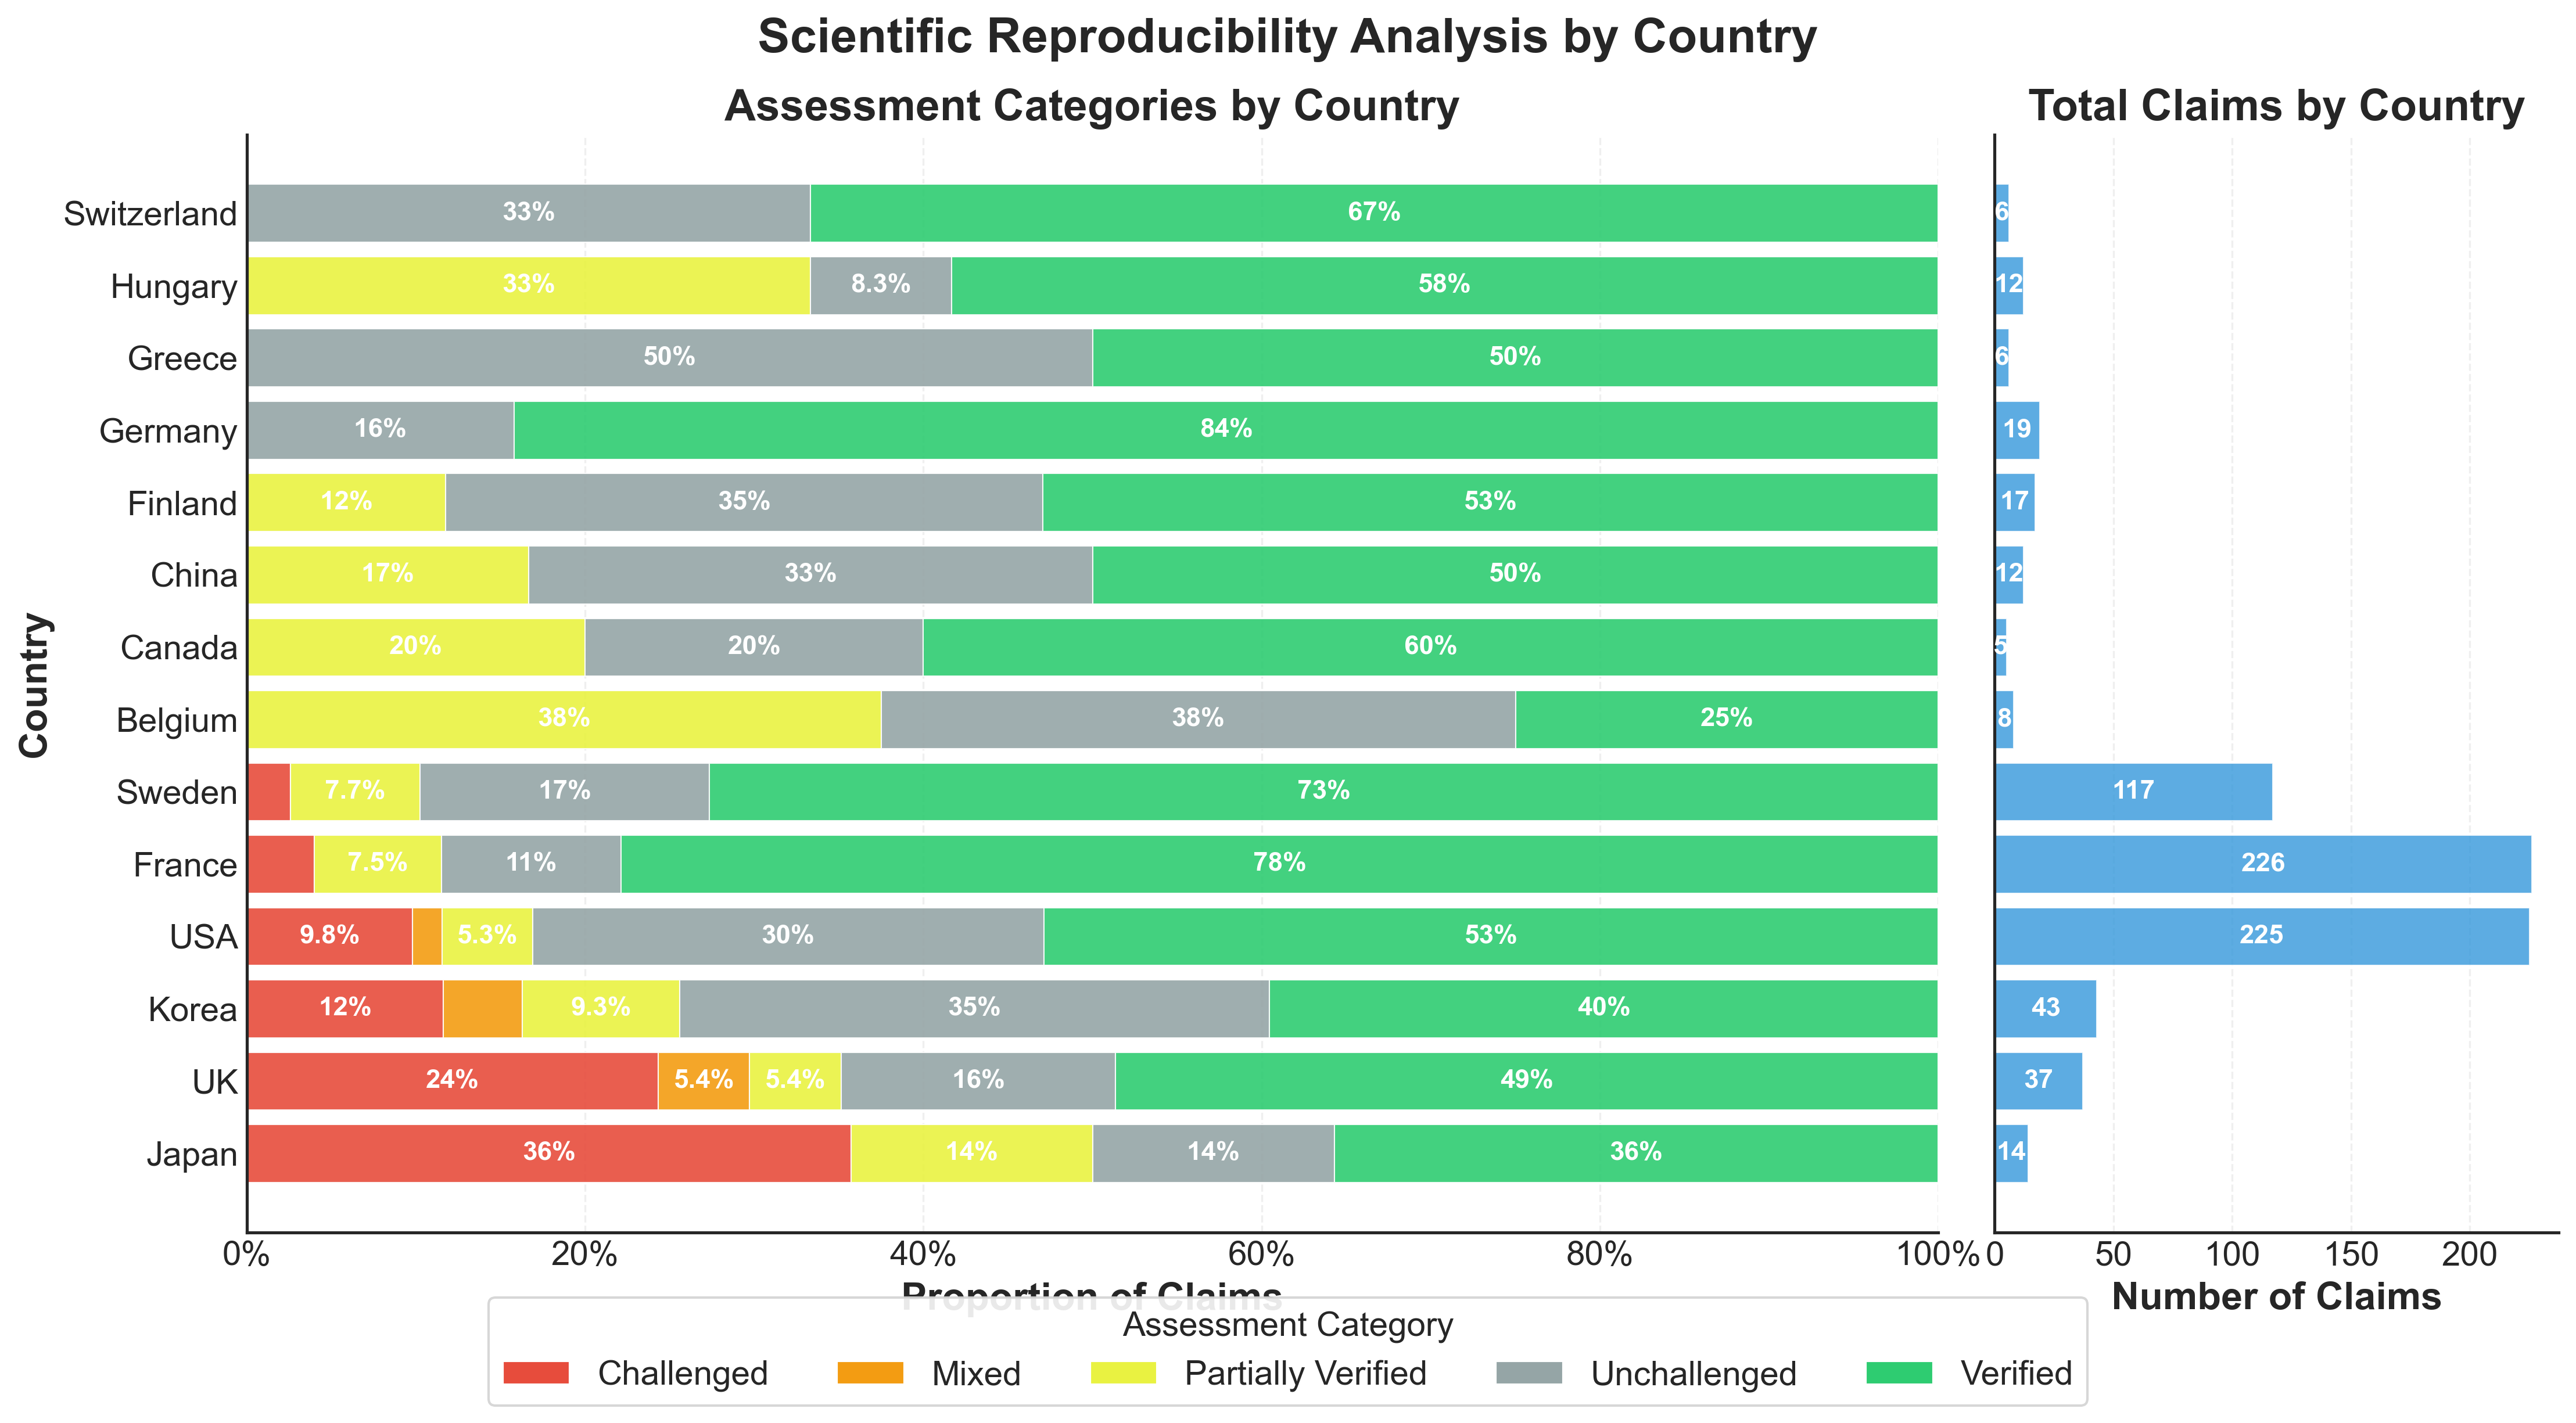

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib as mpl
from matplotlib.patches import Patch

# Set style parameters
plt.style.use('seaborn-v0_8-white')
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# Set figure DPI for publication quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# Define colors for categories
ASSESSMENT_COLORS = plot_info.ASSESSMENT_COLORS

# Define the category order for consistent stacking
ASSESSMENT_ORDER = plot_info.ASSESSMENT_ORDER


def create_two_panel_country_chart(
    df,
    country_col='Country',
    min_claims=5,
    sort_by='Challenged_prop',
    title="Reproducibility Analysis by Country",
    fig_size=(15, 10)
):
    """
    Create a two-panel chart with stacked proportions and a separate bar chart
    for number of claims by country.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe with country-level data
    country_col : str, default='Country'
        Column name for country
    min_claims : int, default=5
        Minimum number of claims for a country to be included
    sort_by : str, default='Challenged_prop'
        How to sort countries
    title : str, default="Reproducibility Analysis by Country"
        Main title for the figure
    fig_size : tuple, default=(15, 10)
        Figure size
        
    Returns:
    --------
    fig : matplotlib Figure object
    """
    # Filter data
    filtered_df = df[df['Major claims'] >= min_claims].copy()
    
    # Aggregate data by country
    categories = ['Challenged', 'Mixed', 'Unchallenged', 'Partially Verified', 'Verified']
    
    # Group by country
    country_sums = filtered_df.groupby(country_col)[categories + ['Major claims', 'Articles']].sum().reset_index()
    
    # Calculate proportions
    for cat in categories:
        country_sums[f'{cat}_prop'] = country_sums[cat] / country_sums['Major claims']
    
    # Sort countries based on the specified criterion
    if sort_by in country_sums.columns:
        country_sums = country_sums.sort_values(sort_by, ascending=False)
    
    # Get list of countries in proper order
    countries = country_sums[country_col].tolist()
    
    # Adjust figure height based on number of countries
    country_count = len(countries)
    if country_count < 5:
        fig_size = (fig_size[0], max(4, country_count * 0.8))
    elif country_count > 12:
        fig_size = (fig_size[0], min(16, country_count * 0.6))
    
    # Create figure with two panels
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=fig_size, gridspec_kw={'width_ratios': [3, 1]})
    
    # Panel 1: Stacked proportions
    y_pos = np.arange(len(countries))
    lefts = np.zeros(len(countries))
    
    # Create stacked bars
    for category in ASSESSMENT_ORDER:
        prop_col = f'{category}_prop'
        widths = country_sums[prop_col].values
        
        # Plot this category as a segment in the stacked bar
        bar = ax1.barh(
            y_pos,
            widths,
            left=lefts,
            color=ASSESSMENT_COLORS[category],
            label=category,
            edgecolor='white',
            linewidth=0.5,
            alpha=0.9
        )
        
        # Update left positions for next category
        lefts += widths
        
        # Add text labels to segments that are large enough
        for i, width in enumerate(widths):
            if width > 0.05:  # Only label segments that are at least 5%
                # Position text in center of segment
                x_pos = lefts[i] - width/2
                
                # Add percentage label
                ax1.text(
                    x_pos,
                    y_pos[i],
                    f'{width:.0%}' if width >= 0.1 else f'{width:.1%}',
                    ha='center',
                    va='center',
                    color='white',
                    fontweight='bold',
                    fontsize=11
                )
    
    # Set country names on y-axis
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(countries)
    
    # Set axis labels and title
    ax1.set_xlabel('Proportion of Claims', fontweight='bold')
    ax1.set_ylabel('Country', fontweight='bold')
    ax1.set_title('Assessment Categories by Country', fontweight='bold')
    
    # Format x-axis as percentage
    ax1.xaxis.set_major_formatter(PercentFormatter(1.0))
    
    # Set x-axis limit
    ax1.set_xlim(0, 1.0)
    
    # Add grid
    ax1.grid(axis='x', linestyle='--', alpha=0.3)
    ax1.set_axisbelow(True)
    
    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Panel 2: Number of claims bar chart
    bars = ax2.barh(
        y_pos,
        country_sums['Major claims'],
        color='#3498db',  # Blue
        alpha=0.8,
        edgecolor='white',
        linewidth=0.5
    )
    
    # Add value labels to bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(
            width/2,
            bar.get_y() + bar.get_height()/2,
            f"{int(width)}",
            ha='center',
            va='center',
            color='white',
            fontweight='bold',
            fontsize=11
        )
    
    # Set axis labels and title
    ax2.set_xlabel('Number of Claims', fontweight='bold')
    ax2.set_title('Total Claims by Country', fontweight='bold')
    
    # Hide y-axis labels (shared with first panel)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([])
    
    # Add grid
    ax2.grid(axis='x', linestyle='--', alpha=0.3)
    ax2.set_axisbelow(True)
    
    # Remove top and right spines
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    # Add legend below the figure
    handles = [Patch(facecolor=ASSESSMENT_COLORS[cat], edgecolor='white', label=cat) for cat in ASSESSMENT_ORDER]
    fig.legend(
        handles=handles,
        loc='lower center',
        ncol=len(ASSESSMENT_ORDER),
        frameon=True,
        framealpha=0.9,
        edgecolor='lightgray',
        title="Assessment Category",
        bbox_to_anchor=(0.5, 0.02)  # FIXED: Adjusted position
    )
    
    # Add main title
    fig.suptitle(title, fontsize=BIGGER_SIZE+2, fontweight='bold', y=0.98)
    
    # FIXED: Better layout adjustment
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15, top=0.90, wspace=0.05)
    
    return fig, (ax1, ax2)


# Example usage for two-panel chart:
fig, (ax1, ax2) = create_two_panel_country_chart(
    df=to_plot,
    min_claims=5,
    sort_by='Challenged_prop',
    title="Scientific Reproducibility Analysis by Country"
)

# plt.savefig('country_stacked_chart.png', dpi=300, bbox_inches='tight')

In [ ]:
# Create a multivariable regression model to predict reproducibility
# First, ensure no object datatypes are in our dataset by examining the data
print("Data types before preprocessing:")
print(df[['Historical lab', 'Continuity', 'Ivy league', 'Articles', 
          'Sex', 'Unchallenged_prop', 'Challenged_prop', 'reproducibility_score']].dtypes)

# Convert any object columns to appropriate types
# Make sure all numeric columns are properly formatted
numeric_cols = ['Articles', 'Unchallenged_prop', 'Challenged_prop', 'reproducibility_score']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert boolean columns to integer
bool_cols = ['Historical lab', 'Continuity']
for col in bool_cols:
    df[col] = df[col].astype(int)
    
# Make sure categorical variables are properly typed
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].astype('category')
    
# Create dummy variables properly
df_model = pd.get_dummies(df[['Historical lab', 'Continuity', 'Ivy league', 
                             'Articles', 'Unchallenged_prop', 'Challenged_prop', 
                             'reproducibility_score']])

# Print data types after preprocessing
print("Data types after preprocessing:")
print(df_model.dtypes)

# Fit regression model for unchallenged proportion
# Select predictors (X) and target (y)
y = df_model['Unchallenged_prop']
X = df_model.drop(['Unchallenged_prop', 'Challenged_prop', 'reproducibility_score'], axis=1)

# Add constant
X = sm.add_constant(X)

# Verify no object datatypes remain
print("X dtypes:", X.dtypes.unique())
print("y dtype:", y.dtype)

# Fit model
try:
    model_unchallenged = sm.OLS(y, X).fit()
    print("Model successfully fit!")
    
    # Create another model for reproducibility score
    y2 = df_model['reproducibility_score']
    model_repro = sm.OLS(y2, X).fit()
    
    # Print summaries
    print("\nRegression Model for Unchallenged Proportion:")
    print(model_unchallenged.summary())
    
    print("\nRegression Model for Reproducibility Score:")
    print(model_repro.summary())
    
    # Create a visual summary of the regression results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Extract coefficients and confidence intervals for unchallenged model
    coefs1 = model_unchallenged.params[1:]
    conf_intervals1 = model_unchallenged.conf_int().iloc[1:]
    errors1 = (conf_intervals1[1] - conf_intervals1[0]) / 3.92  # 95% CI to standard error
    
    # Plot coefficients for unchallenged model
    ax1.errorbar(coefs1, range(len(coefs1)), xerr=errors1, fmt='o', capsize=5, color='#3498db')
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax1.set_yticks(range(len(coefs1)))
    ax1.set_yticklabels(coefs1.index)
    ax1.set_xlabel('Coefficient Value')
    ax1.set_title('Predictors of Unchallenged Claims')
    
    # Extract coefficients and confidence intervals for reproducibility model
    coefs2 = model_repro.params[1:]
    conf_intervals2 = model_repro.conf_int().iloc[1:]
    errors2 = (conf_intervals2[1] - conf_intervals2[0]) / 3.92  # 95% CI to standard error
    
    # Plot coefficients for reproducibility model
    ax2.errorbar(coefs2, range(len(coefs2)), xerr=errors2, fmt='o', capsize=5, color='#2ecc71')
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_yticks(range(len(coefs2)))
    ax2.set_yticklabels(coefs2.index)
    ax2.set_xlabel('Coefficient Value')
    ax2.set_title('Predictors of Reproducibility Score')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error fitting model: {e}")
    print("Let's try an alternative approach using a simpler model")
    
    # Create a simpler model with fewer variables
    basic_vars = ['Articles', 'Historical lab', 'Continuity']
    df_simple = df[basic_vars + ['Unchallenged_prop']].copy()
    
    for col in basic_vars + ['Unchallenged_prop']:
        df_simple[col] = pd.to_numeric(df_simple[col], errors='coerce')
    
    # Drop missing values
    df_simple = df_simple.dropna()
    
    # Run simpler regression
    X_simple = sm.add_constant(df_simple[basic_vars])
    y_simple = df_simple['Unchallenged_prop']
    
    model_simple = sm.OLS(y_simple, X_simple).fit()
    print("\nSimplified Regression Model:")
    print(model_simple.summary())


Data types before preprocessing:
Historical lab              bool
Continuity                  bool
Ivy league                  bool
Articles                   int64
Sex                       object
Unchallenged_prop        float64
Challenged_prop          float64
reproducibility_score    float64
dtype: object
Data types after preprocessing:
Historical lab             int64
Continuity                 int64
Ivy league                  bool
Articles                   int64
Unchallenged_prop        float64
Challenged_prop          float64
reproducibility_score    float64
dtype: object
X dtypes: [dtype('float64') dtype('int64') dtype('bool')]
y dtype: float64
Error fitting model: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Let's try an alternative approach using a simpler model

Simplified Regression Model:
                            OLS Regression Results                            
Dep. Variable:      Unchallenged_prop   R-squared:                  